# Теория для лабораторной 3

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, spectrogram, firwin, lfilter

## Что происходит с сигналом

Когда сигнал проходит от источника (например, датчика) к приемнику (например, компьютеру), он **искажается**:

* Появляются шумы
* Накладываются лишние частоты
* Теряется полезная информация

Для восстановления или выделения нужных компонентов применяются **цифровые фильтры** - математические системы, которые изменяют сигнал определенным образом (усиливают одни частоты и подавляют другие)

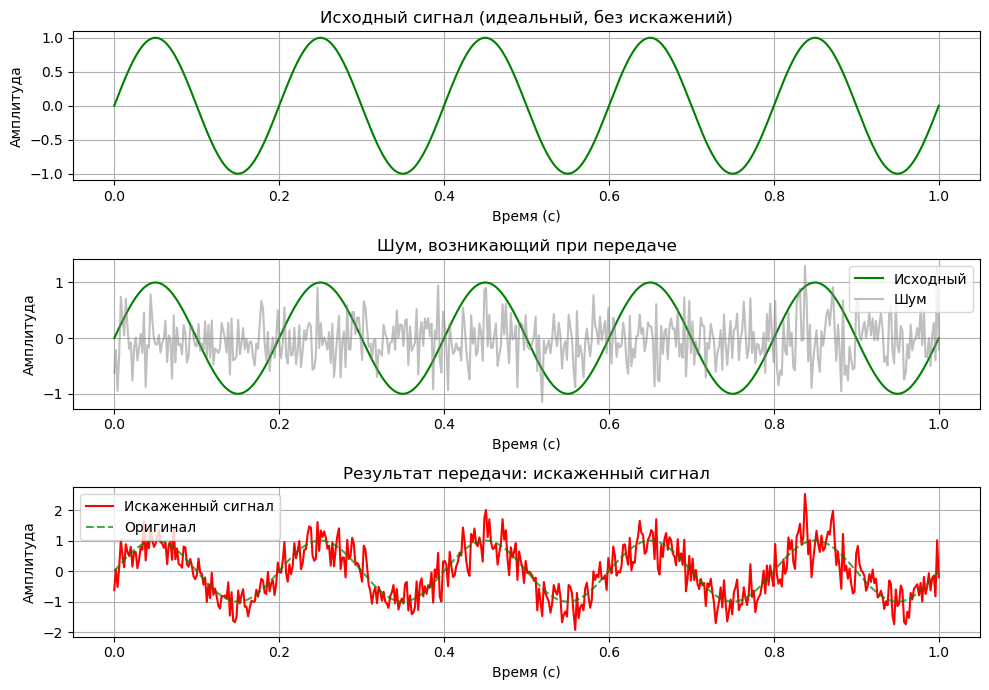

In [6]:
# Исходный идеальный сигнал
fs = 500                            # частота дискретизации, Гц
t = np.linspace(0, 1, fs)           # 1 секунда
clean_signal = np.sin(2*np.pi*5*t)  # синус 5 Гц (идеальный сигнал)

# Искажения при передаче
noise = np.random.normal(0, 0.4, fs)            # случайный шум
high_freq = 0.3 * np.sin(2 * np.pi * 60 * t)    # паразитная высокочастотная помеха
distorted_signal = clean_signal + noise + high_freq



fig, ax = plt.subplots(3, 1, figsize=(10, 7))

# Исходный сигнал
ax[0].plot(t, clean_signal, color="green")
ax[0].set_title("Исходный сигнал (идеальный, без искажений)")
ax[0].set_xlabel("Время (с)")
ax[0].set_ylabel("Амплитуда")
ax[0].grid(True)

# Добавленный шум
ax[1].plot(t, clean_signal, color="green", label="Исходный")
ax[1].plot(t, noise, color="gray", alpha=0.5, label="Шум")
ax[1].set_title("Шум, возникающий при передаче")
ax[1].set_xlabel("Время (с)")
ax[1].set_ylabel("Амплитуда")
ax[1].legend()
ax[1].grid(True)

# Искаженный сигнал (реальный)
ax[2].plot(t, distorted_signal, color="red", label="Искаженный сигнал")
ax[2].plot(t, clean_signal, color="green", linestyle="--", alpha=0.7, label="Оригинал")
ax[2].set_title("Результат передачи: искаженный сигнал")
ax[2].set_xlabel("Время (с)")
ax[2].set_ylabel("Амплитуда")
ax[2].legend()
ax[2].grid(True)

fig.tight_layout()
plt.show()

# Что такое фильтр

**Цифровой фильтр** - это алгоритм, который преобразует входной сигнал $x(n)$ в выходной $y(n)$ по заданным коэффициентам.

Он может:

* Пропускать нужные частоты (фильтр нижних частот - ФНЧ)
* Подавлять лишние (фильтр верхних частот - ФВЧ, полосовой и т.д.)

Формально фильтр описывается **разностным уравнением**:
$$
y(n) = \sum_{k=0}^{M} b_k x(n-k) - \sum_{k=1}^{N} a_k y(n-k)
$$

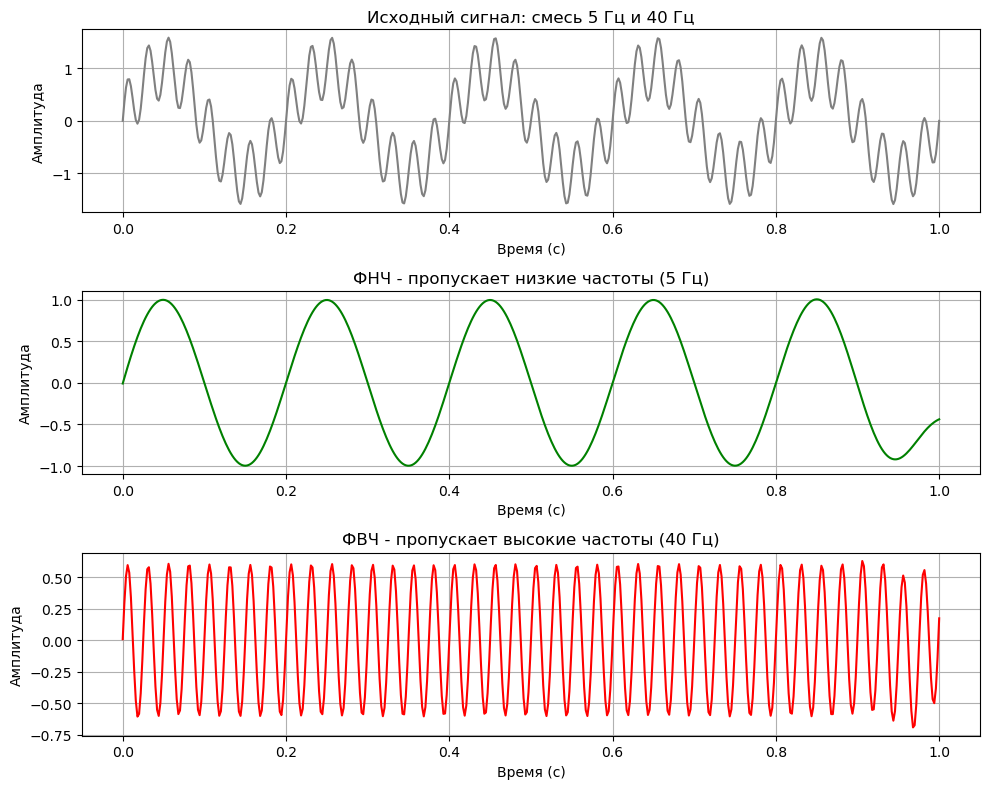

In [8]:
# Создаем исходный сигнал
fs = 500
t = np.linspace(0, 1, fs)
# Полезный сигнал 5 Гц + помеха 40 Гц
x = np.sin(2 * np.pi * 5 * t) + 0.6 * np.sin(2 * np.pi * 40 * t)

# Создаем фильтры
# ФНЧ: пропускает частоты ниже 10 Гц
b_low, a_low = butter(N=4, Wn=10/(fs/2), btype='low')
# ФВЧ: пропускает частоты выше 10 Гц
b_high, a_high = butter(N=4, Wn=10/(fs/2), btype='high')

# Применяем фильтры
y_low = filtfilt(b_low, a_low, x)
y_high = filtfilt(b_high, a_high, x)



fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Исходный сигнал
ax[0].plot(t, x, color="gray")
ax[0].set_title("Исходный сигнал: смесь 5 Гц и 40 Гц")
ax[0].set_xlabel("Время (с)")
ax[0].set_ylabel("Амплитуда")
ax[0].grid(True)

# После фильтра нижних частот
ax[1].plot(t, y_low, color="green")
ax[1].set_title("ФНЧ - пропускает низкие частоты (5 Гц)")
ax[1].set_xlabel("Время (с)")
ax[1].set_ylabel("Амплитуда")
ax[1].grid(True)

# После фильтра верхних частот
ax[2].plot(t, y_high, color="red")
ax[2].set_title("ФВЧ - пропускает высокие частоты (40 Гц)")
ax[2].set_xlabel("Время (с)")
ax[2].set_ylabel("Амплитуда")
ax[2].grid(True)

fig.tight_layout()
plt.show()


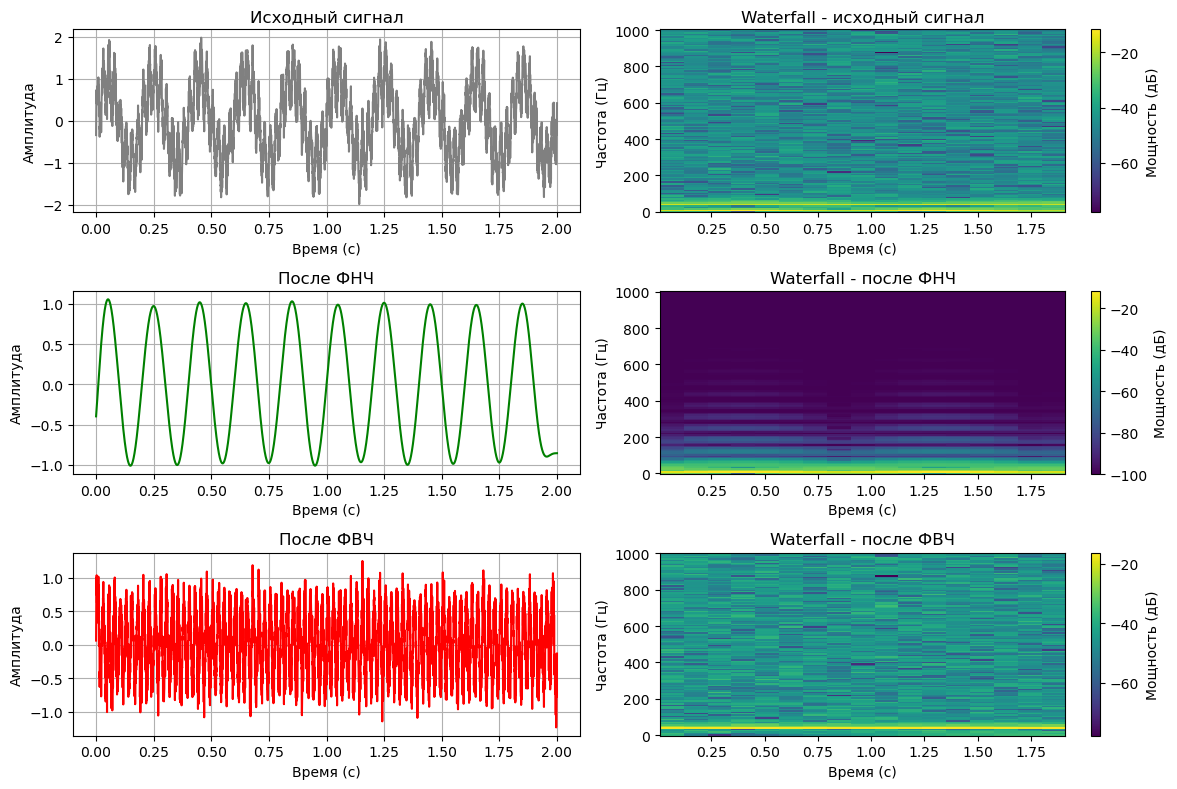

In [13]:
# Исходный сигнал
fs = 2000
t = np.linspace(0, 2, 2 * fs) # 2 секунды
# Сигнал: 5 Гц + 40 Гц + шум
x = np.sin(2*np.pi*5*t) + 0.6*np.sin(2*np.pi*40*t) + np.random.randn(len(t))*0.2

# Фильтры
b_low, a_low = butter(N=4, Wn=10/(fs/2), btype='low')
b_high, a_high = butter(N=4, Wn=10/(fs/2), btype='high')

# Фильтрация
y_low = filtfilt(b_low, a_low, x)
y_high = filtfilt(b_high, a_high, x)

# Waterfall (спектр во времени)
# spectrogram возвращает частоты, времена и мощность (Sxx)
f_x, t_x, Sxx_x = spectrogram(x, fs)
f_low, t_low, Sxx_low = spectrogram(y_low, fs)
f_high, t_high, Sxx_high = spectrogram(y_high, fs)



fig, ax = plt.subplots(3, 2, figsize=(12, 8))

# Левая колонка: сигналы
ax[0, 0].plot(t, x, color="gray")
ax[0, 0].set_title("Исходный сигнал")
ax[0, 0].set_xlabel("Время (с)")
ax[0, 0].set_ylabel("Амплитуда")
ax[0, 0].grid(True)

ax[1, 0].plot(t, y_low, color="green")
ax[1, 0].set_title("После ФНЧ")
ax[1, 0].set_xlabel("Время (с)")
ax[1, 0].set_ylabel("Амплитуда")
ax[1, 0].grid(True)

ax[2, 0].plot(t, y_high, color="red")
ax[2, 0].set_title("После ФВЧ")
ax[2, 0].set_xlabel("Время (с)")
ax[2, 0].set_ylabel("Амплитуда")
ax[2, 0].grid(True)

# Правая колонка: спектры во времени (waterfall)
pcm0 = ax[0, 1].pcolormesh(t_x, f_x, 10*np.log10(Sxx_x+1e-10), shading="auto", cmap="viridis")
ax[0, 1].set_title("Waterfall - исходный сигнал")
ax[0, 1].set_xlabel("Время (с)")
ax[0, 1].set_ylabel("Частота (Гц)")
fig.colorbar(pcm0, ax=ax[0, 1], label="Мощность (дБ)")

pcm1 = ax[1, 1].pcolormesh(t_low, f_low, 10*np.log10(Sxx_low+1e-10), shading="auto", cmap="viridis")
ax[1, 1].set_title("Waterfall - после ФНЧ")
ax[1, 1].set_xlabel("Время (с)")
ax[1, 1].set_ylabel("Частота (Гц)")
fig.colorbar(pcm1, ax=ax[1, 1], label="Мощность (дБ)")

pcm2 = ax[2, 1].pcolormesh(t_high, f_high, 10*np.log10(Sxx_high+1e-10), shading="auto", cmap="viridis")
ax[2, 1].set_title("Waterfall - после ФВЧ")
ax[2, 1].set_xlabel("Время (с)")
ax[2, 1].set_ylabel("Частота (Гц)")
fig.colorbar(pcm2, ax=ax[2, 1], label="Мощность (дБ)")

fig.tight_layout()
plt.show()


# Основные типы фильтров

| Тип фильтра                                           | Особенности                                   | Устойчивость           | Примеры                      |
| ----------------------------------------------------- | --------------------------------------------- | ---------------------- | ---------------------------- |
| **КИХ (FIR)** - конечная импульсная характеристика    | Нет обратных связей, линейная фаза, устойчива | Всегда устойчива       | фильтр Кайзера               |
| **БИХ (IIR)** - бесконечная импульсная характеристика | Есть обратная связь, меньше коэффициентов     | Может быть неустойчива | Баттерворт, Чебышёв, Бессель |

КИХ - выход зависит только от входных данных

БИХ - выход зависит и от входных данных, и от данных предыдущи значений (т.е. от работы самого фильтра)

---

## КИХ (FIR) фильтры

**Суть:**

Выход фильтра зависит **только от входных данных**, без обратной связи
$$
y(n) = \sum_{k=0}^{M} b_k x(n-k)
$$

* Не используют прошлые выходы $y(n-1), y(n-2)...$
* **Устойчивы по определению** (ошибки не накапливаются)
* **Линейная фаза** - не искажают форму сигнала (только задерживают)
* Требуют больше вычислений (длиннее фильтр)

**Когда применять:**

* Когда важна точная форма сигнала (например, обработка аудио, изображений, медицинских сигналов)
* Когда допустимо большее вычислительное время

**Типичные реализации:**

* Фильтр Кайзера
* Ректангуларные, Хэмминговые, Блэкмена окна (окно определяет форму импульсной характеристики)

## БИХ (IIR) фильтры

**Суть:**
Выход фильтра зависит **и от входных, и от предыдущих выходных значений** - есть обратная связь
$$
y(n) = \sum_{k=0}^{M} b_k x(n-k) - \sum_{k=1}^{N} a_k y(n-k)
$$

**Особенности:**

* Используют обратную связь -> отклик может быть "бесконечным"
* **Быстрее**, чем FIR (меньше коэффициентов для того же эффекта)
* **Может быть неустойчив**, если коэффициенты выбраны неправильно
* **Нелинейная фаза** - форма сигнала может искажаться

**Когда применять:**

* Когда важна скорость обработки
* Когда не критичны фазовые искажения (например, в измерительных системах)

**Типичные реализации:**

* Баттерворт - максимально плавный спад
* Чебышёв - более резкий спад, но с рябью
* Бессель - минимальные фазовые искажения
* Эллиптический - самый крутой спад (но сильная рябь)

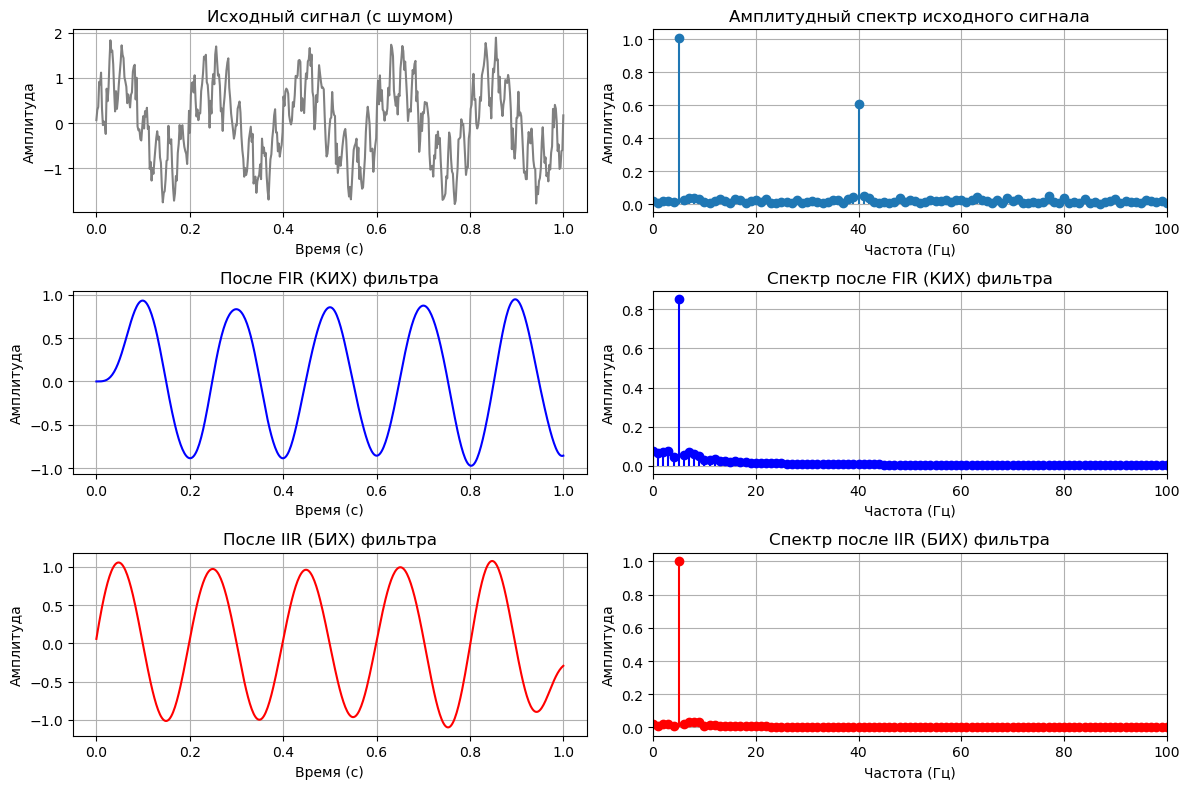

In [ ]:
# Исходный сигнал
fs = 500
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 5 * t) + 0.6 * np.sin(2 * np.pi * 40 * t) + np.random.randn(len(t)) * 0.2

# КИХ (FIR) фильтр - без обратной связи
numtaps = 51                         # длина фильтра (число коэффициентов)
cutoff_fir = 10 / (fs / 2)           # нормализованная частота среза
b_fir = firwin(numtaps, cutoff_fir)  # коэффициенты FIR
y_fir = lfilter(b_fir, [1.0], x)

# БИХ (IIR) фильтр - с обратной связью (Баттерворт)
b_iir, a_iir = butter(N=4, Wn=10/(fs/2), btype='low')
y_iir = filtfilt(b_iir, a_iir, x)

# Спектры
def compute_spectrum(signal, fs):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, d=1/fs)
    amp = np.abs(np.fft.rfft(signal)) / N * 2
    return freqs, amp

freqs, amp_x = compute_spectrum(x, fs)
_, amp_fir = compute_spectrum(y_fir, fs)
_, amp_iir = compute_spectrum(y_iir, fs)



fig, ax = plt.subplots(3, 2, figsize=(12, 8))

# Левая колонка: сигналы во времени
ax[0, 0].plot(t, x, color="gray")
ax[0, 0].set_title("Исходный сигнал (с шумом)")
ax[0, 0].set_xlabel("Время (с)")
ax[0, 0].set_ylabel("Амплитуда")
ax[0, 0].grid(True)

ax[1, 0].plot(t, y_fir, color="blue")
ax[1, 0].set_title("После FIR (КИХ) фильтра")
ax[1, 0].set_xlabel("Время (с)")
ax[1, 0].set_ylabel("Амплитуда")
ax[1, 0].grid(True)

ax[2, 0].plot(t, y_iir, color="red")
ax[2, 0].set_title("После IIR (БИХ) фильтра")
ax[2, 0].set_xlabel("Время (с)")
ax[2, 0].set_ylabel("Амплитуда")
ax[2, 0].grid(True)

# Правая колонка: спектры
ax[0, 1].stem(freqs, amp_x, basefmt=" ", label="До фильтрации")
ax[0, 1].set_title("Амплитудный спектр исходного сигнала")
ax[0, 1].set_xlabel("Частота (Гц)")
ax[0, 1].set_ylabel("Амплитуда")
ax[0, 1].set_xlim(0, 100)
ax[0, 1].grid(True)

ax[1, 1].stem(freqs, amp_fir, basefmt=" ", linefmt="b-", markerfmt="bo")
ax[1, 1].set_title("Спектр после FIR (КИХ) фильтра")
ax[1, 1].set_xlabel("Частота (Гц)")
ax[1, 1].set_ylabel("Амплитуда")
ax[1, 1].set_xlim(0, 100)
ax[1, 1].grid(True)

ax[2, 1].stem(freqs, amp_iir, basefmt=" ", linefmt="r-", markerfmt="ro")
ax[2, 1].set_title("Спектр после IIR (БИХ) фильтра")
ax[2, 1].set_xlabel("Частота (Гц)")
ax[2, 1].set_ylabel("Амплитуда")
ax[2, 1].set_xlim(0, 100)
ax[2, 1].grid(True)

fig.tight_layout()
plt.show()